<a href="https://colab.research.google.com/github/OfficialAlok/TimeSeriesVisualizer/blob/main/TimeSeriesVisualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Page View Time Series Visualizer

### Imported data and making it sure to parse dates. Considered setting column to `date`.

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df = pd.read_csv("https://github.com/OfficialAlok/TimeSeriesVisualizer/raw/refs/heads/main/fcc-forum-pageviews.csv", parse_dates=["date"], index_col="date")

# Clean data
df = df[(df['value'] > df['value'].quantile(0.025)) & (df['value'] < df['value'].quantile(0.975))]



## Drawing line plot

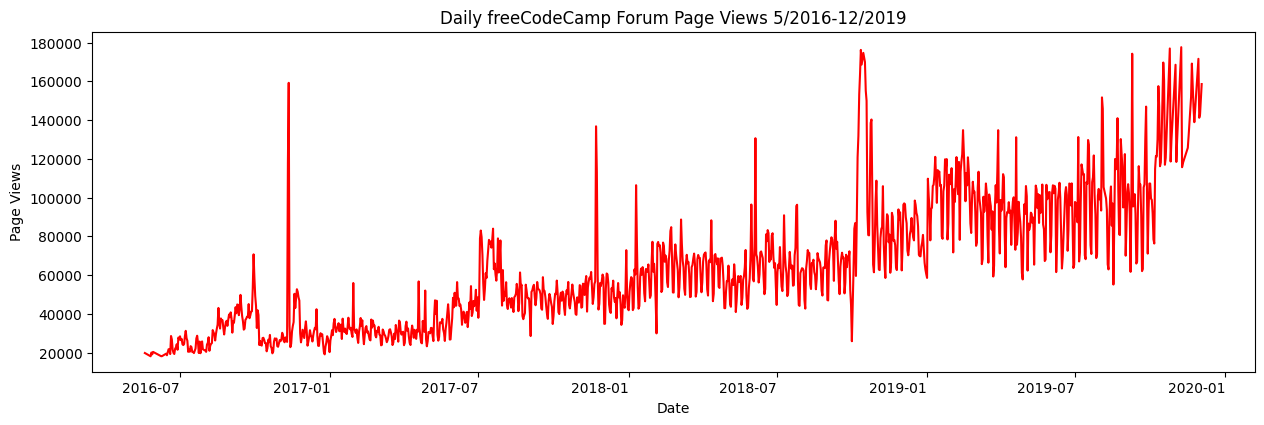

In [38]:
fig, ax = plt.subplots(figsize=(15, 5))

df.plot(kind = "line", ax=ax, color='red',
        title="Daily freeCodeCamp Forum Page Views 5/2016-12/2019", legend=None,
        xlabel="Date", ylabel="Page Views")
plt.xticks(rotation="horizontal")

fig.savefig('lineplot.png')

## Drawing bar plot

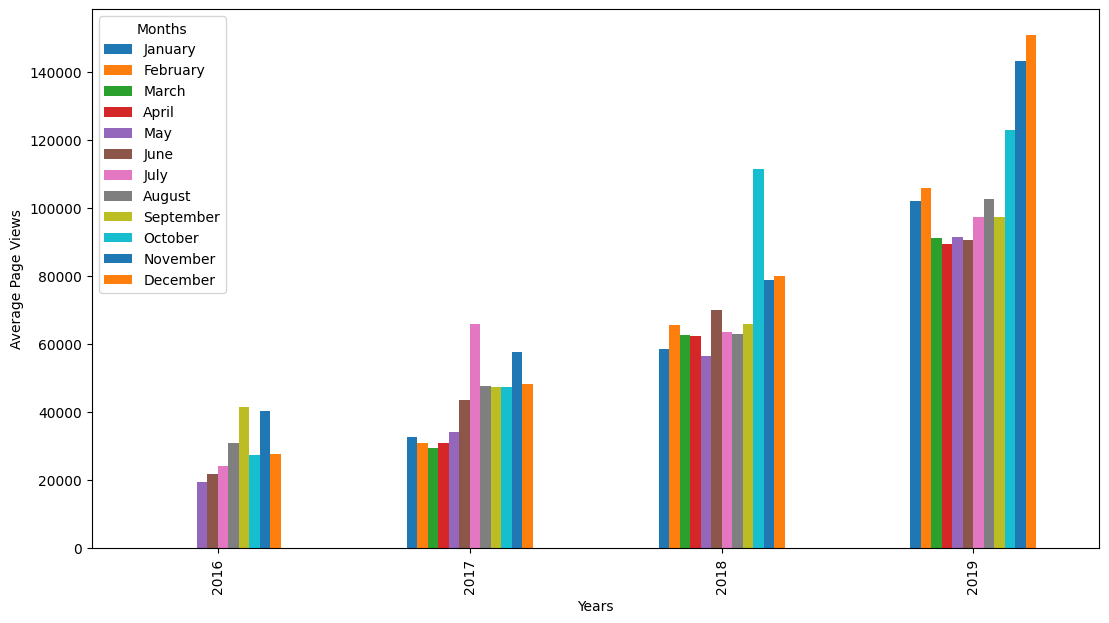

In [34]:
df_bar = df.copy()
df_bar.reset_index(inplace=True)
df_bar = df_bar.groupby([df.index.year, df.index.month]).mean().value.unstack()

df_bar.columns = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df_bar.columns.name = "Months"
fig = df_bar.plot(kind='bar', figsize=(13, 7), ylabel = "Average Page Views", xlabel="Years").get_figure()

fig.savefig("barplot.png")

## Drawing box plot

In [27]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [28]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

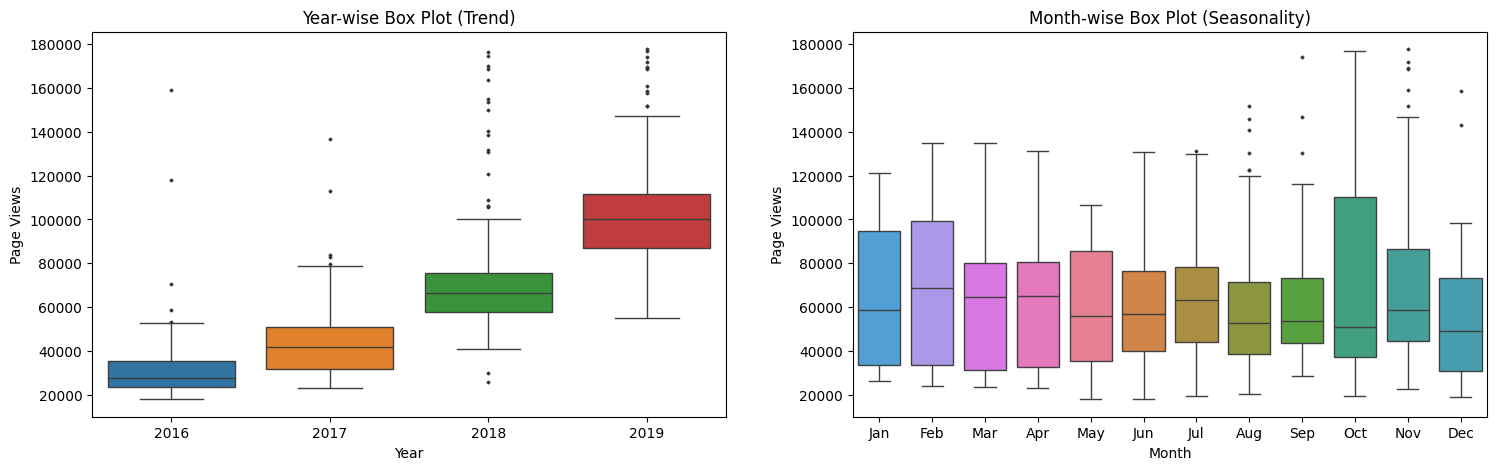

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))
sns.boxplot(df_box, x="year", y="value", ax=ax[0],
            hue="year", palette="tab10", flierprops={"marker":'D', "markersize":1.5, "markerfacecolor":'black'})
sns.boxplot(df_box, x="month", y="value", ax=ax[1],
            order = month_order, hue ="month",
            flierprops={"marker":'D', "markersize":1.5, "markerfacecolor":'black'})
ax[0].set_title("Year-wise Box Plot (Trend)")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Page Views")
ax[1].set_ylabel("Page Views")
ax[1].set_title("Month-wise Box Plot (Seasonality)")
ax[1].set_xlabel("Month")
ax[0].legend().remove()

In [36]:
fig.savefig("box-plot.png")